In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
import sklearn


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, LSTM, Input,SpatialDropout1D, GlobalMaxPool1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn import model_selection
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, precision_score, accuracy_score, recall_score, f1_score
from tensorflow.keras.optimizers import Adam

In [2]:
# 5. Membaca file CSV ke dalam DataFrame
import pandas as pd
df = pd.read_csv('dataset_50k.csv')
df.head()

Unnamed: 0  Label                                         detokenize
0           0      1  aku luka diri aku jalan hidup sulit orang tua ...
1           1      0   buang pikir negatif laku gelisah milik putus asa
2           2      1  jujur aku takut mati aku orang aku sulit paham...
3           3      0              saya mes pasang sepatu jam saya harap
4           4      1  capek hati banget aku allah aku kayak mata ora...

In [3]:
df = df.dropna()
df

Unnamed: 0  Label                                         detokenize
0               0      1  aku luka diri aku jalan hidup sulit orang tua ...
1               1      0   buang pikir negatif laku gelisah milik putus asa
2               2      1  jujur aku takut mati aku orang aku sulit paham...
3               3      0              saya mes pasang sepatu jam saya harap
4               4      1  capek hati banget aku allah aku kayak mata ora...
...           ...    ...                                                ...
50518       50518      0  curi rampok liar begal rakyat senantiasa resah...
50519       50519      0                      saya bicara saya buat tertawa
50520       50520      1  sakit sakit guna sakit bahagia sakit bohong or...
50521       50521      1                              lantai lantai gelisah
50522       50522      1  aku tulis catat kemarin kata tunang aku laku b...

[50523 rows x 3 columns]

In [4]:
df['label'] = df['Label'].apply(lambda x: 0 if x == 0 else 1)
df.head()

Unnamed: 0  Label                                         detokenize  label
0           0      1  aku luka diri aku jalan hidup sulit orang tua ...      1
1           1      0   buang pikir negatif laku gelisah milik putus asa      0
2           2      1  jujur aku takut mati aku orang aku sulit paham...      1
3           3      0              saya mes pasang sepatu jam saya harap      0
4           4      1  capek hati banget aku allah aku kayak mata ora...      1

<BarContainer object of 2 artists>

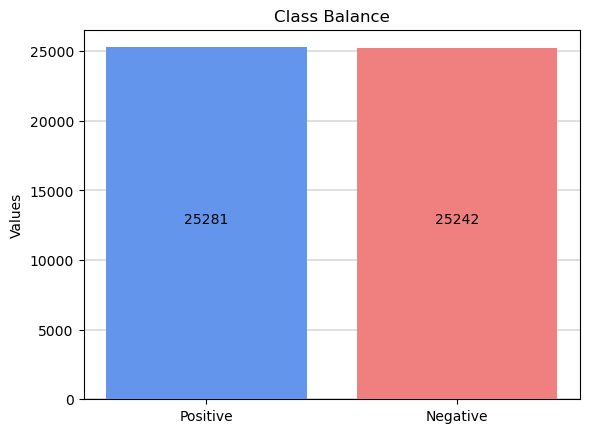

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center',zorder=4)

# Count the values in the 'Label' column
count = df['Label'].value_counts()
x = ["Positive", "Negative"]  # Custom labels for class balance plot
y = [count[1], count[0]]
addlabels(x,y)
plt.ylabel("Values")
plt.title('Class Balance')
plt.grid(color='dimgray', linewidth=0.3, axis='y',zorder=0)
plt.bar(x,y, color= ['cornflowerblue', 'lightcoral'], zorder=3)

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vektorisasi teks menggunakan TF-IDF unigram+bigram+trigram(1,3)
vectorizer = TfidfVectorizer(min_df=10, ngram_range=(1,3), max_df= 0.7 )

# Menggunakan fit_transform untuk mengubah dokumen menjadi fitur
vector = vectorizer.fit_transform(df['detokenize']).toarray()
tf_idf_len = len(vectorizer.vocabulary_)

In [7]:
#Split data 90% data train and 10% data test
x_unibitrigram = pd.DataFrame(vector)
label = df["Label"]
x_train, x_test, y_train, y_test =  model_selection.train_test_split(x_unibitrigram, label, test_size = 0.1)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(45470, 20200) (45470,)
(5053, 20200) (5053,)


In [8]:
y_train

40691    0
16053    0
37883    1
50317    0
38163    1
        ..
32621    1
32016    0
26945    1
10965    0
7317     1
Name: Label, Length: 45470, dtype: int64

In [9]:
x_train

0      1      2      3      4      5      6      7      8      9      \
40691    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
16053    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
37883    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
50317    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
38163    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
32621    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
32016    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
26945    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
10965    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
7317     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       ...  20190  20191  20192  20193  20194  20195  20196  20197  20198  \
40691  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
16053  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
37883  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
50317  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
38163  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
32621  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
32016  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
26945  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
10965  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
7317   ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       20199  
40691    0.0  
16053    0.0  
37883    0.0  
50317    0.0  
38163    0.0  
...      ...  
32621    0.0  
32016    0.0  
26945    0.0  
10965    0.0  
7317     0.0  

[45470 rows x 20200 columns]

In [10]:
x_train = np.array(x_train).reshape(-1, 1, x_train.shape[1])
x_test = np.array(x_test).reshape(-1, 1, x_test.shape[1])

In [11]:
x_train.shape

(45470, 1, 20200)

In [12]:
import matplotlib.pyplot as plt

def make_plot(history, train, validation, title):
    graph = plt.plot(history.history[train], lw=2.0)
    graph = plt.plot(history.history[validation], lw=2.0)
    graph = plt.title(title)
    graph = plt.legend(['training', 'validasi'])
    graph = plt.show()

    return graph

In [13]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Membuat model lstm
def lstm(x_train, y_train, x_test, y_test):


    model = Sequential()
    model.add(Input(shape=(1,x_train.shape[2])))
    model.add(SpatialDropout1D(0.25))
    model.add(LSTM(128, recurrent_dropout=0.2))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy',optimizer=optimizer ,metrics=['accuracy'])
    print(model.summary())

    history = model.fit(x_train, y_train, epochs = 10, validation_data=(x_test, y_test), callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)] )

    #Membuat plot garis akurasi
    make_plot(history, "accuracy", "val_accuracy", "Perubahan Akurasi tiap epoch")

    #predict
    predictions = model.predict(x_test)
    print()
    print("Classification Report :")
    print(classification_report(y_test, predictions.round(), digits=6))


    acc_score = accuracy_score(y_test, predictions.round())
    prec_score = precision_score(y_test, predictions.round())
    rec_score = recall_score(y_test, predictions.round())
    f1score = f1_score(y_test, predictions.round())

    return [acc_score,prec_score,rec_score,f1score ]


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ spatial_dropout1d               │ (None, 1, 20200)       │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │    10,408,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,412,609 (39.72 MB)

 Trainable params: 10,412,609 (39.72 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 101s 69ms/step - accuracy: 0.7605 - loss: 0.4746 - val_accuracy: 0.8255 - val_loss: 0.3529
Epoch 2/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 97s 68ms/step - accuracy: 0.8431 - loss: 0.3272 - val_accuracy: 0.8304 - val_loss: 0.3516
Epoch 3/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 99s 70ms/step - accuracy: 0.8535 - loss: 0.2985 - val_accuracy: 0.8272 - val_loss: 0.3617
Epoch 4/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 98s 69ms/step - accuracy: 0.8592 - loss: 0.2876 - val_accuracy: 0.8274 - val_loss: 0.3724
Epoch 5/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 98s 69ms/step - accuracy: 0.8675 - loss: 0.2734 - val_accuracy: 0.8272 - val_loss: 0.3751


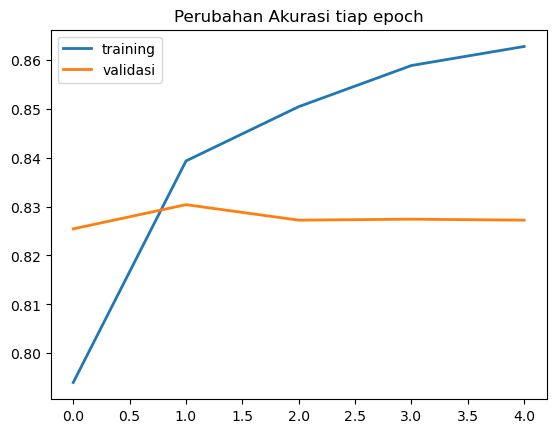

158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

Classification Report :
              precision    recall  f1-score   support

           0   0.853171  0.785914  0.818163      2499
           1   0.805525  0.867659  0.835438      2554

    accuracy                       0.827231      5053
   macro avg   0.829348  0.826786  0.826801      5053
weighted avg   0.829089  0.827231  0.826895      5053



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ spatial_dropout1d_1             │ (None, 1, 20200)       │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │    10,408,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,412,609 (39.72 MB)

 Trainable params: 10,412,609 (39.72 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 101s 70ms/step - accuracy: 0.7660 - loss: 0.4706 - val_accuracy: 0.8262 - val_loss: 0.3561
Epoch 2/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 98s 69ms/step - accuracy: 0.8418 - loss: 0.3244 - val_accuracy: 0.8253 - val_loss: 0.3529
Epoch 3/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 97s 68ms/step - accuracy: 0.8527 - loss: 0.3029 - val_accuracy: 0.8253 - val_loss: 0.3643
Epoch 4/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 99s 69ms/step - accuracy: 0.8622 - loss: 0.2808 - val_accuracy: 0.8237 - val_loss: 0.3659
Epoch 5/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 97s 68ms/step - accuracy: 0.8670 - loss: 0.2697 - val_accuracy: 0.8262 - val_loss: 0.3811


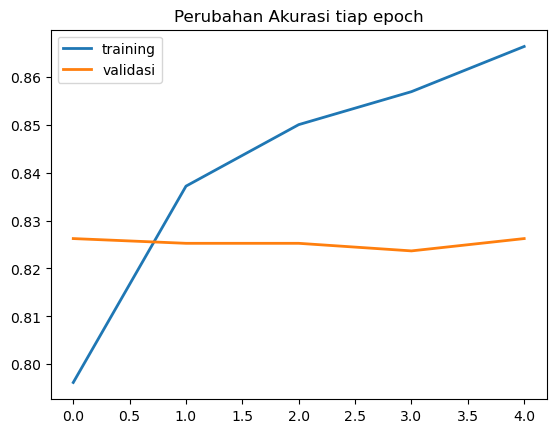

158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

Classification Report :
              precision    recall  f1-score   support

           0   0.828803  0.817527  0.823127      2499
           1   0.823802  0.834769  0.829249      2554

    accuracy                       0.826242      5053
   macro avg   0.826303  0.826148  0.826188      5053
weighted avg   0.826275  0.826242  0.826221      5053



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ spatial_dropout1d_2             │ (None, 1, 20200)       │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 128)            │    10,408,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,412,609 (39.72 MB)

 Trainable params: 10,412,609 (39.72 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 100s 68ms/step - accuracy: 0.7669 - loss: 0.4687 - val_accuracy: 0.8276 - val_loss: 0.3539
Epoch 2/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 97s 68ms/step - accuracy: 0.8434 - loss: 0.3245 - val_accuracy: 0.8294 - val_loss: 0.3515
Epoch 3/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 97s 68ms/step - accuracy: 0.8539 - loss: 0.3004 - val_accuracy: 0.8294 - val_loss: 0.3558
Epoch 4/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 98s 69ms/step - accuracy: 0.8616 - loss: 0.2873 - val_accuracy: 0.8262 - val_loss: 0.3680
Epoch 5/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 97s 68ms/step - accuracy: 0.8656 - loss: 0.2735 - val_accuracy: 0.8241 - val_loss: 0.3761


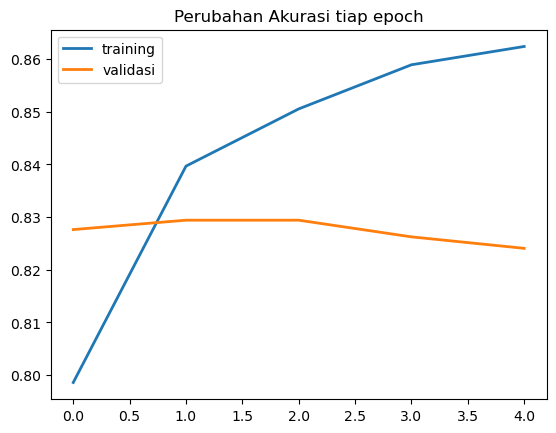

158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

Classification Report :
              precision    recall  f1-score   support

           0   0.837385  0.799520  0.818014      2499
           1   0.812148  0.848081  0.829726      2554

    accuracy                       0.824065      5053
   macro avg   0.824767  0.823801  0.823870      5053
weighted avg   0.824629  0.824065  0.823934      5053



In [14]:
result = []
result.append(lstm(x_train, y_train, x_test, y_test))
result.append(lstm(x_train, y_train, x_test, y_test))
result.append(lstm(x_train, y_train, x_test, y_test))

In [15]:
average = np.mean(result, axis=0, dtype=float)
print('Average Accuracy  :', average[0])
print('Average Precision :', average[1])
print('Average Recall    :', average[2])
print('Average F1-Score  :', average[3])

Average Accuracy  : 0.8258460320601623
Average Precision : 0.8138253029378087
Average Recall    : 0.8501696684938658
Average F1-Score  : 0.8314712304093111
